#### Abstract

**문제 의식** 
* 데이터의 용량이 크고, intractable한 사후 분포를 갖는 연속형 잠재 변수가 존재할 때 어떻게 효과적으로 확률 모델을 학습시키고 추론할 수 있을까?
* 완화된 미분가능성 조건과 intractable한 경우에 대해서도 잘 적용될 수 있는 학습 알고리즘을 제안 with Stochastic Variational Inference


**Contribution**
1. 표준적인 경사하강법을 이용해 직접적이고 간단하게 최적화가 가능한 lower bound estimator를 구함(Variational Lower Bound의 reparameterization)
2. Lower Bound Estimator를 통해 intractable한 사후 분포에 근사 추론 모델을 학습시켜 효율적으로 사후추론을 진행할 수 있음

#### 1. Introduction

**Variational Bayes** : 계산 불가능한(intractable) 사후 분포의 근사에 대한 최적화 but 사후 분포의 근사치에 대한 기댓값의 분석적 해에 대한 계산이 불가능(intractable)

**Variational Lower Bound에 대한 Reparameterization은 lower bound의 미분가능한(tractable) 비편향 추정량을 생성** 
  * reparameterization 트릭을 통해 간단히 구할 수 있음
=> 이 SGVB 추정량은 효율적인 근사 사후추론을 가능케 하며, 표준적인 경사하강법을 통해 직접적인 최적화가 가능




**AEVB** : 위의 SGVB를 이용하여 목적함수를 최적화하는 알고리즘
  * recognition model : 잠재변수에 대한 intractable한 사후분포 p(z|x)에 대한 근사
  * SGVB알고리즘을 통해 위 모델을 쉽게 최적화할 수 있음(기존의 MCMC보다 효율적임)
  * 학습된 근사 사후추론 모델(recognition model)은 다양한 다른 task들에 적용 가능

#### 2. Method

* 연속형 잠재변수를 갖는 유향 그래피컬 모델로부터 lower bound estimator를 유도하는 방법론
* iid한 데이터셋, 개별 데이터 포인트는 잠재변수를 가짐, 잠재변수에 대한 Variational Inference를 수행하고자 함

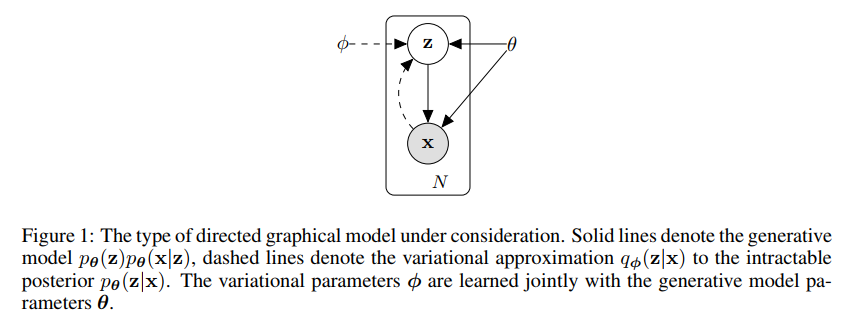

#### 2.1 Probelm Scenario


* 생성 프로세스
  1. 잠재변수 z가 사전분포 p_theta(z)로부터 생성됨
  2. 데이터 포인트 x가 조건부 분포 p_theta(x|z)로부터 생성됨
  
  
* 문제 : theta에 대한 참값, 잠재 변수는 알려져 있지 않음 
 
**본 연구는 marginal 분포 p_theta(x), 사후분포를 단순화하는 가정 X, 현실의 복잡한 문제 상황에도 잘 일반화 될 수 있는 알고리즘 제안**
  1. Intractability 
     * p_theta(x)가 intractable(marginal likelihood에 대한 미분이 불가능)
     * True Posterior p_theta(z|x)가 intractable (머신러닝 알고리즘 적용 불가능)
     * marginal likelihood에 대한 적분식은 알지 못하는 변수 z를 이용하는 것을 포함 (계산이 불가능함) 
     
     
  2. A large dataset
     * Batch optimazation의 연산량이 많음, 보다 작은 크기의 minibatch나 개별 데이터 포인트를 사용해서 파라미터를 갱신

Marginal Likelihood : 
True Posterior : 

**해결책**
1. 파라미터 theta에 대한 효율적인 근사
2. 모수 theta하에 관측된 변수 x값이 주어졌을 때 잠재변수 z에 대한 효율적인 근사 사후 추론(P_theta(z|x)에 대한 근사 사후 추론)
3. Marginal P_theta(x)에 대한 근사 추론 (x에 대한 효율적인 marginal inference)

**z의 intractable한 true posterior p_theta(z|x)에 대한 근사 분포 q_phi(z|x)를 도입** (recognition model)
  * recognition model의 파라미터 phi와 생성 모델p_theta(x|z)의 파라미터 theta를 동시에 묶어서(jointly) 학습
  * q_phi(z|x) : Probabilistic Encoder - 데이터가 주어졌을 때 잠재표현 z의 모든 가능한 값에 대한 분포를 반환
  * p_theta(x|z) : Probabilistic Decoder - 잠재표현 z가 주어졌을 때 이에 mapping되는 데이터 x에 대한 분포를 반환

#### 2.2 The variational bound

* x의 marginal likelihood의 가능도는 아래와 같은 식으로 표현이 가능

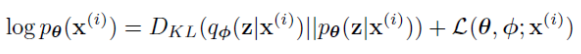

* KL divergence는 두 확률 분포의 차이를 계산하는데 사용, KLD가 줄어드는 방향으로 근사 분포인 q_phi(z)를 조금씩 업데이트하는 과정을 반복하면 true posterior p_theta(z|x)를 잘 근사하는 optimal 분포를 얻을 수 있음, non-negative

* L : variational lower bound on the marginal likelihood of datapoint i (L을 최대화 <ㅡ> VAE의 목적함수를 최대화)

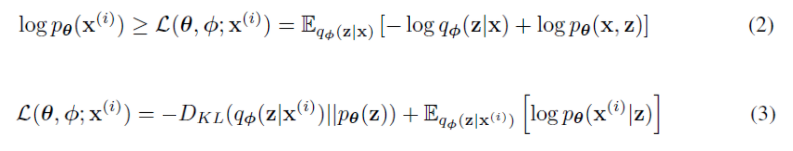


* 생성 모델의 목적은 실제 데이터 x의 marginal likelihood log(p_theta(x))를 최대화하는 파라미터를 추정하는 것, MLE에 의해 정의된 모형은 데이터 x의 분포를 가장 잘 설명함 But 실제 데이터x의 marginal한 분포는 알수 없고, 잠재변수 z에 의해 x가 조건부로 생성됨
* 따라서 encoder p(z|x), decoder p(x|z)를 통해(z에 의해 x가 조건부로 생성되는 과정) x의 marginal likelihood를 간접적으로 최대화할 수 있음 
* lower bound L은 tractable(미분가능)

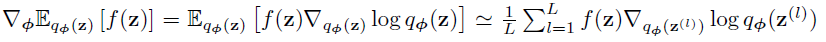

* 위와 같은 Monte Carlo방식으로 구해진 gradient esimator는 분산이 높다는 단점이 있음

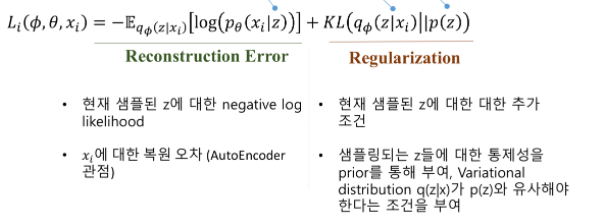

* Reconstruction Error : encoder가 데이터 x를 입력으로 받아 q로부터 잠재벡터 z를 반환, decoder가 z를 받아 p로부터 원 데이터 x를 복원
* q를 zero-mean gaussian에 근사하도록 만듬

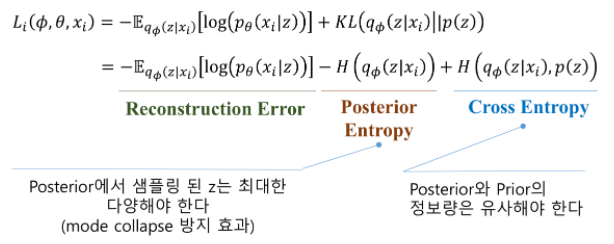

#### 2.3 The SGVB estimator and AEVB algorithm

* lower bound와 그 gradient에 대한 실용적인 추정량 구하기(x에 대한 조건부가 아닐때도 가능한)
* 어떤 mild한 조건 하에서 주어진 근사 사후 분포 q_phi(z|x)에 대해 보조 변수인 noise variable e를 사용하여 reparameterize
  * g_phi는 데이터 포인트 x와 노이즈 벡터 e를 받아 근사 사후 분포에서의 샘플 z로 mapping
  * noise를 뽑고 noise로부터 z를 계산 (z를 직접 샘플링 하는 것보다 분산이 적어 유용함)
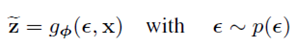
* z에 대한 어떤 함수 f(z)의 기댓값에 대한 몬테 카를로 추정량은(랜덤 표본을 뽑아 함수의 값을 확률적으로 계산하는 몬테 카를로 방법을 이용하면 사후 확룰 분포에 대한 아무런 정보가 없는 상황에서 q(z)를 어떤 분포든 사용할 수 있게 됨)

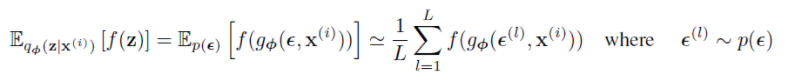

* variational lower bound를 적용하여 추정량을 구함,  SGVB 추정량은 다음과 같이 정의

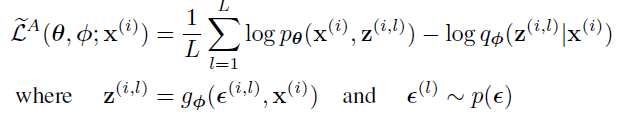

* 미니 배치를 이용한 lower bound에 대한 근사적 추정량
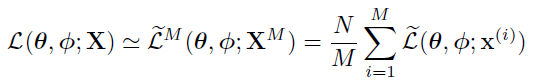

#### 2.4 The reparameterization trick

* 역전파를 통한 end to end모델의 업데이트를 위해서는 연결된 모든 과정및 요소가 미분가능해야 함
* z는 추정된 q_phi(z|x)로부터 샘플링되는 random variable, **샘플링은 미분이 불가능한 operation**
  * z에 대한 직접적 샘플링 대신 보조 변수 e를 샘플링하고, x와의 transformation을 통해 z를 정의
 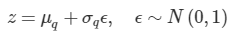
  * z는 transformation function g가 미분 가능한 함수이기만 하면 됨
  
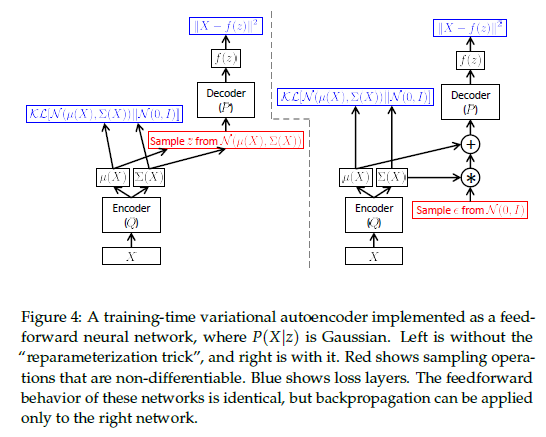

#### 3. Example: Variational Auto Encoder

* probabilistic encoder q를 신경망을 이용해 모델링, 파라미터 theta와 phi를 AEVB알고리즘으로 동시에 최적화
* Assumptions
  1. 잠재 변수 z에 대한 prior는 isotropic 다변량 정규분포
  2. probabilistic decoder p는 신경망에 의해 파라미터가 정의되는 다변량 정규분포 or 베르누이
  3. z의 true posterior에 대해서도 정규분포 가정
* 이 경우 lower bound의 추정량은
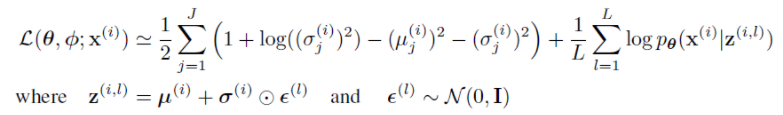

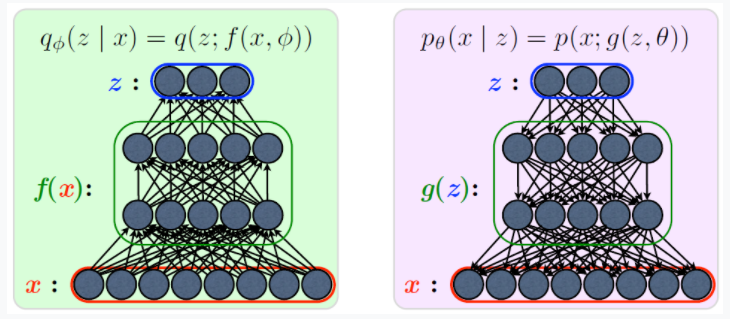

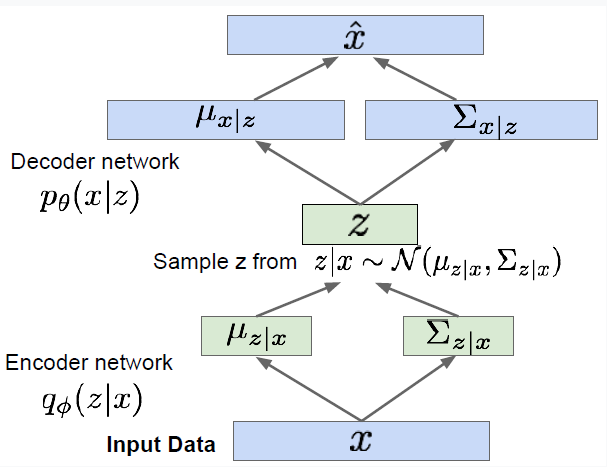

#### 4. Conclusion

* 연속적인 잠재변수가 있는 상황에서 효율적인 근사 추론을 위한 Variational Lower Bound제안
* Lower Bound에 대한 추정량으로 Stochastic Gradient Variational Bayes제시 - 간단하게 미분 가능, 표준적인 확률적 경사 하강법으로 최적화가 가능
* iid조건을 만족하고 연속형 잠재변수를 포함한 데이터에서 SGVB 추정량을 활용하여, 효과적으로 추론과 학습이 가능한 근사 추론 모델을 최적화 시키는 Auto-Encoding Variational Bayes 알고리즘 소개

#### 참고

https://ratsgo.github.io/generative%20model/2017/12/19/vi/

https://ratsgo.github.io/generative%20model/2018/01/27/VAE/

In [22]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
batch_size = 100
original_dim = 784  # 28 x 28
latent_dim = 2  # 잠재변수의 차원(평균, 분산)
intermediate_dim = 256  # 중간층 노드 수
epochs = 50
epsilon_std = 1.0

In [11]:
def sampling(args: tuple):  # 2.4 참고
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [13]:
x = Input(shape=(original_dim,), name='input')  # 인코더 입력
h = Dense(intermediate_dim, activation='relu', name='encoding')(x)  # 중간층

z_mean = Dense(latent_dim, name='mean')(h)  #잠재 공간의 평균
z_log_var = Dense(latent_dim, name='log-variance')(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])  # 하나의 z가 샘플링 함수를 통해 z_mean, z_log_var와 연결

encoder = Model(x, [z_mean, z_log_var, z], name='encoder')

In [14]:
input_decoder = Input(shape=(latent_dim,), name="decoder_input")  # 디코더 입력
decoder_h = Dense(intermediate_dim, activation='relu', name="decoder_h")(input_decoder)  # 잠재 공간을 중간층 차원으로 복원
x_decoded = Dense(original_dim, activation='sigmoid', name="flat_decoded")(decoder_h)  # 원본 차원으로 복원
decoder = Model(input_decoder, x_decoded, name="decoder")

In [15]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 784)]        0                                            
__________________________________________________________________________________________________
encoding (Dense)                (None, 256)          200960      input[0][0]                      
__________________________________________________________________________________________________
mean (Dense)                    (None, 2)            514         encoding[0][0]                   
__________________________________________________________________________________________________
log-variance (Dense)            (None, 2)            514         encoding[0][0]                   
____________________________________________________________________________________________

In [16]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_h (Dense)            (None, 256)               768       
_________________________________________________________________
flat_decoded (Dense)         (None, 784)               201488    
Total params: 202,256
Trainable params: 202,256
Non-trainable params: 0
_________________________________________________________________


In [17]:
output_combined = decoder(encoder(x)[2])  # enocder출력=decoder입력, encoder3번째 반환값이 z (encoder = Model(x, [z_mean, z_log_var, z], name='encoder'))
vae = Model(x, output_combined)
vae.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
encoder (Functional)         [(None, 2), (None, 2), (N 201988    
_________________________________________________________________
decoder (Functional)         (None, 784)               202256    
Total params: 404,244
Trainable params: 404,244
Non-trainable params: 0
_________________________________________________________________


In [20]:
def vae_loss(x: tf.Tensor, x_decoded_mean: tf.Tensor,
            z_log_var=z_log_var, z_mean=z_mean,
            original_dim=original_dim):
    xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(
        1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)  # 교차 엔트로피와 KL발산을 더해서 손실함수 정의
    return vae_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [23]:
vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size)

Epoch 1/50


_SymbolicException: Inputs to eager execution function cannot be Keras symbolic tensors, but found [<tf.Tensor 'log-variance/BiasAdd:0' shape=(None, 2) dtype=float32>, <tf.Tensor 'mean/BiasAdd:0' shape=(None, 2) dtype=float32>]

In [ ]:
# 2차원의 잠재 공간을 그래프에 표현 (클래스 별로 잘 군집화가 되어있음)

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)[0]
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
# z에따라 결과가 얼마나 달라지는 지

n = 15  
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()